# Encoding

In [ ]:
!pip install hdbscan

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import missingno as msng
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [ ]:
ruta = "/content/gdrive/MyDrive/Ejercicios ciencia de datos/full (1).csv"

#EDA

In [ ]:
titanic=pd.read_csv(ruta)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Surname,Fsize,Family,FsizeD,Child,Mother
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,Braund,2,Braund_2,small,Adult,Not Mother
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,Cumings,2,Cumings_2,small,Adult,Not Mother
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen,1,Heikkinen_1,singleton,Adult,Not Mother
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,Futrelle,2,Futrelle_2,small,Adult,Not Mother
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,Allen,1,Allen_1,singleton,Adult,Not Mother
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,"Spector, Mr. Woolf",male,31.123845,0,0,A.5. 3236,8.0500,S,Mr,Spector,1,Spector_1,singleton,Adult,Not Mother
1305,1306,1.0,1,"Oliva y Ocana, Dona. Fermina",female,44.000000,0,0,PC 17758,108.9000,C,Rare Title,Oliva y Ocana,1,Oliva y Ocana_1,singleton,Adult,Not Mother
1306,1307,0.0,3,"Saether, Mr. Simon Sivertsen",male,31.123845,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,Saether,1,Saether_1,singleton,Adult,Not Mother
1307,1308,1.0,3,"Ware, Mr. Frederick",male,34.000000,0,0,359309,8.0500,S,Mr,Ware,1,Ware_1,singleton,Adult,Not Mother


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fsize
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.385791,2.294882,29.521198,0.498854,0.385027,33.276193,1.883881
std,378.020061,0.486968,0.837836,12.917016,1.041658,0.865560,51.743584,1.583639
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,11.000000


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   object 
 12  Surname      1309 non-null   object 
 13  Fsize        1309 non-null   int64  
 14  Family       1309 non-null   object 
 15  FsizeD       1309 non-null   object 
 16  Child        1309 non-null   object 
 17  Mother       1309 non-null   object 
dtypes: float64(3), int64(5), object(10)
memory usage

<Axes: >

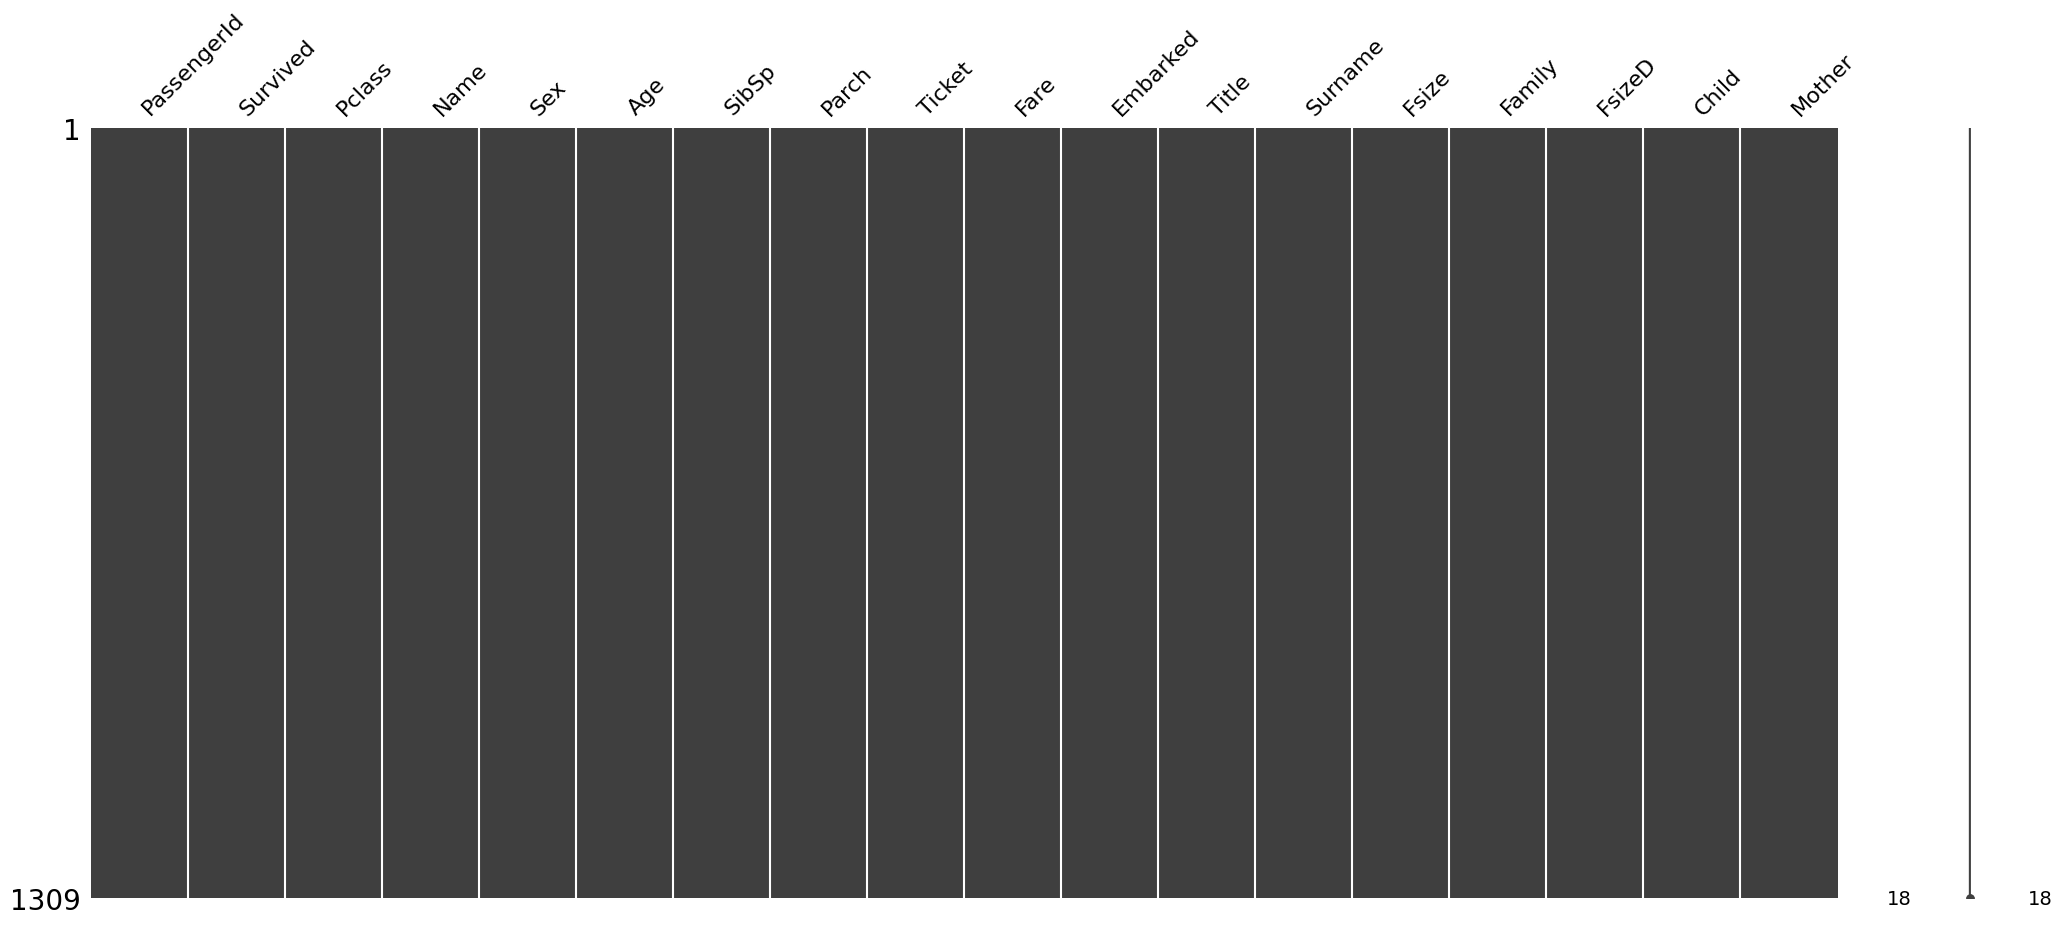

In [ ]:
msng.matrix(titanic)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Surname,Fsize,Family,FsizeD,Child,Mother
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Braund,2,Braund_2,small,Adult,Not Mother
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Cumings,2,Cumings_2,small,Adult,Not Mother
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen,1,Heikkinen_1,singleton,Adult,Not Mother
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Futrelle,2,Futrelle_2,small,Adult,Not Mother
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Allen,1,Allen_1,singleton,Adult,Not Mother


# Ingeniería de atributos

## Dimensiones:

*   PassengerId
*   Survived
*   Pclass
*   Name
*   Sex
*   Ticket
*   Embarked
*   Title
*   Surname
*   FsizeD
*   Child
*   Mother


## Medidas:

*   Age
*   SibSp
*   Parch
*   Fare
*   Fsize






## Codificación de categorías

In [ ]:
# Crear un diccionario con los mapeos de reemplazo para cada dato único
reemplazos_1 = {valor: i for i, valor in enumerate(titanic['Sex'].unique())}

# Aplicar el reemplazo a la columna 'DIANOM'
titanic['Sex'] = titanic['Sex'].replace(reemplazos_1)

In [ ]:
print(reemplazos_1)

{'male': 0, 'female': 1}


In [ ]:
# Crear un diccionario con los mapeos de reemplazo para cada dato único
reemplazos_2 = {valor: i for i, valor in enumerate(titanic['FsizeD'].unique())}

# Aplicar el reemplazo a la columna 'FsizeD'
titanic['FsizeD'] = titanic['FsizeD'].replace(reemplazos_2)

In [ ]:
print(reemplazos_2)

{'small': 0, 'singleton': 1, 'large': 2}


In [ ]:
# Crear un diccionario con los mapeos de reemplazo para cada dato único
reemplazos_3 = {valor: i for i, valor in enumerate(titanic['Child'].unique())}

# Aplicar el reemplazo a la columna 'Child'
titanic['Child'] = titanic['Child'].replace(reemplazos_3)

In [ ]:
print(reemplazos_3)

{'Adult': 0, 'Child': 1}


In [ ]:
# Crear un diccionario con los mapeos de reemplazo para cada dato único
reemplazos_4 = {valor: i for i, valor in enumerate(titanic['Mother'].unique())}

# Aplicar el reemplazo a la columna 'Mother'
titanic['Mother'] = titanic['Mother'].replace(reemplazos_4)

In [ ]:
print(reemplazos_4)

{'Not Mother': 0, 'Mother': 1}


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Surname', 'Fsize',
       'Family', 'FsizeD', 'Child', 'Mother'],
      dtype='object')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   object 
 12  Surname      1309 non-null   object 
 13  Fsize        1309 non-null   int64  
 14  Family       1309 non-null   object 
 15  FsizeD       1309 non-null   int64  
 16  Child        1309 non-null   int64  
 17  Mother       1309 non-null   int64  
dtypes: float64(3), int64(9), object(6)
memory usage:

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Surname,Fsize,Family,FsizeD,Child,Mother
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr,Braund,2,Braund_2,0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs,Cumings,2,Cumings_2,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen,1,Heikkinen_1,1,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs,Futrelle,2,Futrelle_2,0,0,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr,Allen,1,Allen_1,1,0,0


In [ ]:
#Seleccionar las features para el análisis
features = titanic[['Sex', 'FsizeD', 'Child',
       'Mother', 'Age', 'Fare', 'Pclass', 'Fsize']]

#Escalar las características para normalizar
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

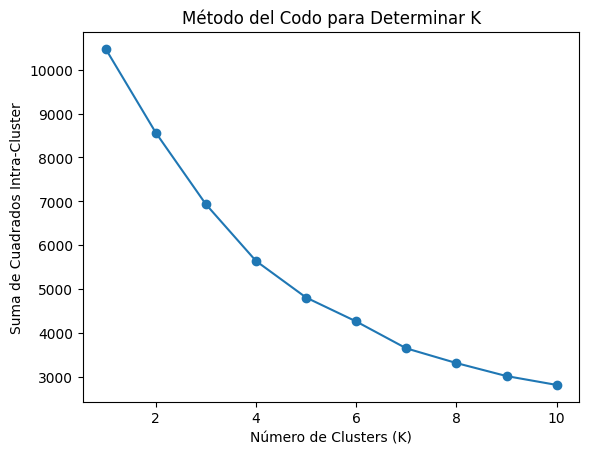

In [ ]:
#Método de codo
sum_of_squares = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled) #Atributos escalados
    sum_of_squares.append(kmeans.inertia_)

# Visualizar la curva del codo
plt.plot(k_values, sum_of_squares, marker='o')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de Cuadrados Intra-Cluster')
plt.show()

#### Se deduce que el númeo de clusterings es 4 según la gráfica del codo

# Machine Learning

#### Se crea el modelo de machine learning que pueda clasificar según la edad de los pasajeros y la tafifa que se pagó si existe un agrupamiento

#K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


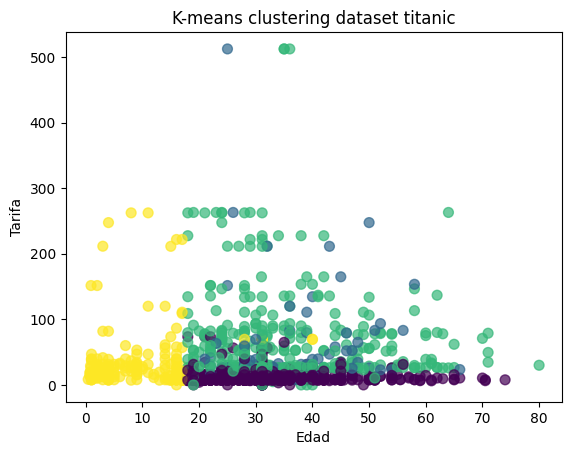

In [ ]:
#Aplicar kmeans con k optimo 4
kmeans = KMeans(n_clusters=4, random_state=42)
#Hacemos el fit de los datos
kmeans_labels = kmeans.fit_predict(features_scaled)

#Crear scatter plot
plt.scatter(features['Age'], features['Fare'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means clustering dataset titanic')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()


# Conclusión

#### Según el método de K-means se puede observar un agrupamento por tarifa entre los 0 y los 280 UM (Unidades Monetarias) y en edad entre los 0 y 18 años